<a href="https://colab.research.google.com/github/eduardamota/artigo-teste-hipoteses/blob/main/artigo_teste_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TESTES DE HIPÓTESES**

### **Construção dos gráficos**

In [11]:
#importando as biblioetecas
import numpy as np
import pandas as pdb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
#Gerando os dados
np.random.seed(10)
data = np.random.normal(loc=0, scale=1, size=150000)

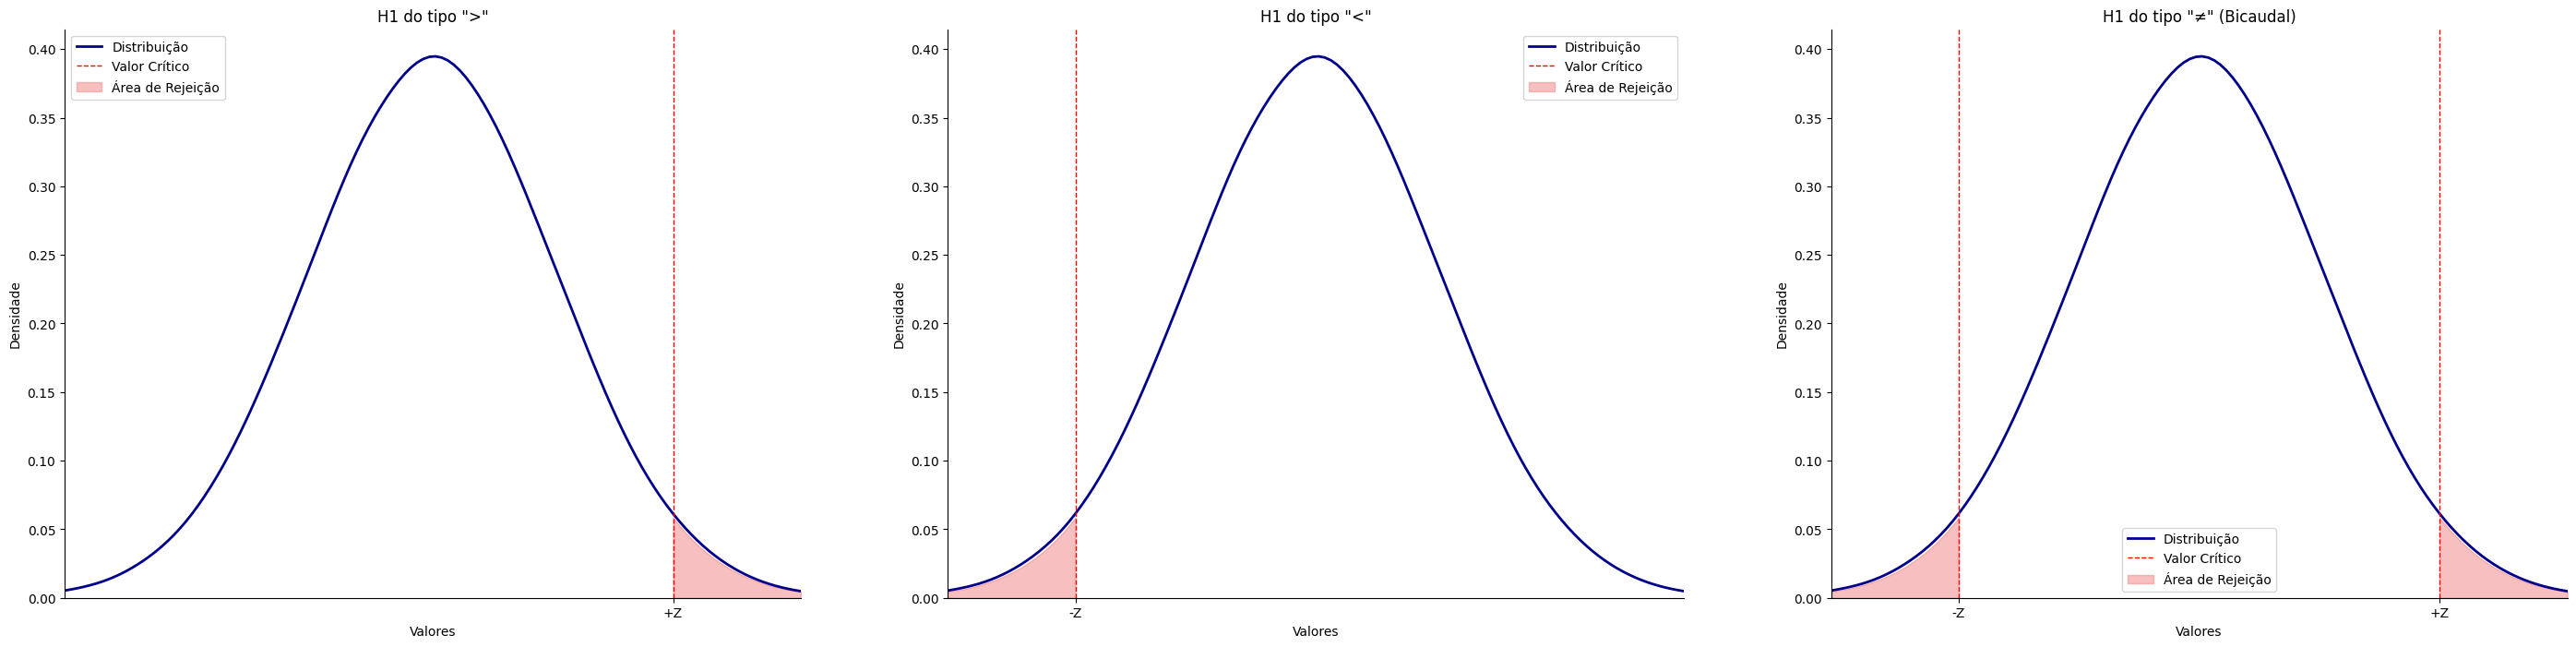

In [13]:
plt.figure(figsize=(35, 8))

# Gráfico para H1 do tipo ">"
plt.subplot(1, 3, 1)
sns.kdeplot(data, color='darkblue', linewidth=2, bw_method=0.2, label='Distribuição')
plt.title('H1 do tipo ">"')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.xlim(-3, 3)
plt.axvline(x=1.96, color='red', linestyle='--', linewidth=1, label='Valor Crítico')
x_values = np.linspace(-3, 3, 100000)
y_values = norm.pdf(x_values, 0, 1)
mask = x_values > 1.96
plt.fill_between(x_values[mask], 0, y_values[mask], color='lightcoral', alpha=0.5, label='Área de Rejeição')
plt.xticks([1.96], ['+Z'])
sns.despine()
plt.legend()

# Gráfico para H1 do tipo "<"
plt.subplot(1, 3, 2)
sns.kdeplot(data, color='darkblue', linewidth=2, bw_method=0.2, label='Distribuição')
plt.title('H1 do tipo "<"')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.xlim(-3, 3)
plt.axvline(x=-1.96, color='red', linestyle='--', linewidth=1, label='Valor Crítico')
mask = x_values < -1.96
plt.fill_between(x_values[mask], 0, y_values[mask], color='lightcoral', alpha=0.5, label='Área de Rejeição')
sns.despine()
plt.xticks([-1.96], ['-Z'])
plt.legend()

# Gráfico para H1 do tipo "<>" (Bicaudal)
plt.subplot(1, 3, 3)
sns.kdeplot(data, color='darkblue', linewidth=2, bw_method=0.2, label='Distribuição')
plt.title('H1 do tipo "≠" (Bicaudal)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.xlim(-3, 3)
plt.axvline(x=-1.96, color='red', linestyle='--', linewidth=1, label='Valor Crítico')
plt.axvline(x=1.96, color='red', linestyle='--', linewidth=1)
mask_left = x_values < -1.96
mask_right = x_values > 1.96
plt.fill_between(x_values[mask_left], 0, y_values[mask_left], color='lightcoral', alpha=0.5, label='Área de Rejeição')
plt.fill_between(x_values[mask_right], 0, y_values[mask_right], color='lightcoral', alpha=0.5)
sns.despine()
plt.legend()
plt.xticks([-1.96, 1.96], ['-Z', '+Z'])
plt.show()

***
#**Impacto da Introdução de um Chatbot na Taxa de Engajamento dos Usuários**

**Problema:**
Com o objetivo de melhorar a experiência do usuário e aumentar o engajamento no aplicativo, uma empresa de tecnologia decidiu introduzir um chatbot para fornecer suporte instantâneo aos usuários. A empresa deseja determinar se a introdução do chatbot teve um impacto significativo na taxa de engajamento dos usuários após o seu lançamento. Em outras palavras, queremos testar se o uso do chatbot está associado a uma mudança estatisticamente significativa na taxa de interações dos usuários com o aplicativo.

In [14]:
#Dados do problema
np.random.seed(0)  # Para tornar os resultados reproduzíveis
engajamento_sem_chatbot = np.random.normal(loc=30, scale=10, size=1000)  # Taxa de engajamento sem o chatbot
engajamento_com_chatbot = np.random.normal(loc=35, scale=10, size=1000)  # Taxa de engajamento com o chatbot

## **Passo 1: Definição das Hipóteses Nula e Alternativa**
**Hipótese Nula (H0):** A introdução do chatbot no aplicativo não tem impacto significativo na taxa de engajamento dos usuários após o lançamento (médias iguais).

**Hipótese Alternativa (H1):** A introdução do chatbot no aplicativo tem um impacto significativo na taxa de engajamento dos usuários após o lançamento (médias diferentes).



*   **H0**:engajamento_sem_chatbot=engajamento_com_chatbot
*   **H1**:engajamento_sem_chatbot≠engajamento_com_chatbot









### **Passo 2**:  **Escolha da distribuição amostral adequada**







In [15]:
from scipy.stats import shapiro, levene

# Verificando a normalidade usando o teste de Shapiro-Wilk
_, p_normal_sem_chatbot = shapiro(engajamento_sem_chatbot)
_, p_normal_com_chatbot = shapiro(engajamento_com_chatbot)

# Verificando a homogeneidade de variâncias usando o teste de Levene
_, p_levene = levene(engajamento_sem_chatbot, engajamento_com_chatbot)

alpha = 0.05

# Verificando a normalidade e homogeneidade de variâncias
if p_normal_sem_chatbot > alpha and p_normal_com_chatbot > alpha and p_levene > alpha:
    print("Ambas as amostras são normalmente distribuídas e têm variâncias homogêneas.")
    print("Você pode usar o teste t de duas amostras (ttest_ind).")
else:
    print("As amostras não atendem às suposições para o teste t de duas amostras.")
    print("É recomendado usar um teste não paramétrico.")

Ambas as amostras são normalmente distribuídas e têm variâncias homogêneas.
Você pode usar o teste t de duas amostras (ttest_ind).


##**Passo 3: Escolha o nível de significância (α)**

Em uma conversa com o time de produto da empresa, decidimos escolher um nível de significância de 0.01 para este teste, indicando que estamos dispostos a aceitar uma probabilidade de 1% de cometer um erro ao rejeitar a hipótese nula.

In [16]:
alpha = 0.01

##**Passo 4: Calculando a Estatística de Teste e P-valor**

Para realizar um teste t de duas amostras independentes, podemos usar a função ttest_ind do módulo scipy.stats para calcular a estatística de teste e o valor p

In [17]:
#imports
from scipy.stats import ttest_ind

In [18]:
stat, p_value = ttest_ind(engajamento_sem_chatbot, engajamento_com_chatbot)

### **Passo 5** - **Aceitação ou rejeição da hipótese nula**:

In [19]:
print("Estatística de Teste:", stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rejeitamos a hipótese nula: Existe evidência estatística de que o chatbot teve impacto significativo na taxa de engajamento.")
else:
    print("Aceitamos a hipótese nula: Não há evidência estatística de que o chatbot teve impacto significativo na taxa de engajamento.")


Estatística de Teste: -12.776193373444594
Valor p: 5.473894155199859e-36
Rejeitamos a hipótese nula: Existe evidência estatística de que o chatbot teve impacto significativo na taxa de engajamento.


Com base nos resultados do teste de hipóteses utilizando um nível de significância de 1%, rejeitamos a hipótese nula. Em outras palavras, há evidências estatísticas suficientes para concluir que a introdução do chatbot teve um impacto significativo na taxa de engajamento dos usuários no aplicativo.

***
##**Guia para realização de testes**

**ANOVA (Análise de Variância):**

In [ ]:
from scipy.stats import f_oneway

# Substitua grupo1, grupo2, grupo3 pelos seus próprios dados
stat, p_value = f_oneway(grupo1, grupo2, grupo3)

**Teste Z (Teste Z de Proporções)**

In [ ]:
from scipy.stats import norm

# Substitua p1 e p2 pelas proporções que você está comparando
# Substitua n1 e n2 pelos tamanhos das amostras correspondentes
z_stat = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))



**Teste t de Student para Amostras Pareadas:**

In [ ]:
import scipy.stats as stats

from scipy.stats import ttest_rel

# Substitua antes e depois pelos seus próprios dados
stat, p_value = ttest_rel(antes, depois)



**Teste t de Student - Variâncias diferentes**

In [ ]:
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(grupo1, grupo2, equal_var=False)  # Para variâncias diferentes (Teste t de Welch)

Documentação do scipy : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

